In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import tree
from sklearn import metrics
import os
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

### Reading Training data

In [2]:
df1=pd.read_csv("./processed/training/engaged.csv")
df2=pd.read_csv("./processed/training/notEngaged.csv")
dff=pd.read_csv("./TopFeatures.csv")

In [3]:
dft=pd.concat([df1,df2])

In [4]:
feat=dff.to_numpy()
feat=feat.reshape(-1)

In [5]:
print(feat)

[' AU12_c' ' AU04_c' ' AU04_r' ' AU12_r' ' AU05_c' ' AU14_c' ' AU06_c'
 ' AU10_c' ' AU14_r' ' AU06_r' ' p_8' ' p_2' ' AU07_r' ' AU10_r' ' p_6'
 ' p_0' ' p_10' ' p_23' ' p_7' ' AU25_r' ' AU09_r' ' AU01_r' ' p_12'
 ' AU17_r' ' p_24' ' AU02_r' ' AU45_r' ' p_19' ' AU26_r' ' p_26' ' AU15_c'
 ' AU05_r' ' p_11' ' p_15' ' p_20' ' p_30' ' p_16' ' p_18' ' gaze_angle_y'
 ' p_3' ' AU23_r' ' AU20_r' ' AU15_r' ' p_5' ' p_25' ' p_9' ' p_13'
 ' p_22' ' p_27' ' p_32']


In [6]:
y_train=dft["Result"]
x_train=dft.drop("Result",axis=1)
x_train=x_train[feat]

In [7]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



### Splitting training and test at ratio 75% to 25%

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train,test_size=0.25)

In [9]:
X_train

,AU12_c,AU04_c,AU04_r,AU12_r,AU05_c,AU14_c,AU06_c,AU10_c,AU14_r,AU06_r,...,AU23_r,AU20_r,AU15_r,p_5,p_25,p_9,p_13,p_22,p_27,p_32
4255,0.0,0.0,0.00,0.12,0.0,0.0,0.0,0.0,0.41,0.00,...,0.00,0.00,0.10,-4.757,0.074,-0.938,-0.542,0.270,0.018,-0.016
3725,0.0,0.0,0.48,0.51,0.0,0.0,0.0,0.0,0.90,0.03,...,0.00,0.29,0.09,-3.359,0.176,1.084,-0.534,-0.013,-0.019,0.006
7566,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,...,0.00,0.00,0.00,1.862,0.037,0.837,0.085,0.021,0.015,0.006
5842,1.0,0.0,0.00,0.32,0.0,1.0,0.0,0.0,0.28,0.32,...,0.00,0.00,0.10,1.822,-0.078,0.203,-0.191,-0.186,-0.015,0.006
8315,0.0,0.0,0.43,0.00,0.0,0.0,0.0,0.0,0.00,0.00,...,0.00,0.00,0.00,2.941,0.062,0.813,0.229,0.067,-0.036,-0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8145,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,...,0.00,0.00,0.00,-1.878,-0.130,1.916,-1.098,0.228,0.023,-0.011
8071,0.0,0.0,0.00,0.50,0.0,0.0,0.0,0.0,0.34,0.49,...,0.00,0.00,0.00,-1.992,-0.002,1.050,0.426,0.039,-0.010,0.004
9223,0.0,0.0,0.66,0.10,0.0,0.0,0.0,0.0,0.17,0.38,...,0.00,0.37,0.00,4.187,0.047,0.806,0.046,0.000,-0.074,-0.003
6181,0.0,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.09,0.00,...,0.00,0.00,0.00,-0.933,0.087,0.563,-0.707,0.134,0.028,-0.005


### Initialize model with optimum parameters

In [10]:
model=tree.DecisionTreeClassifier(class_weight="balanced")

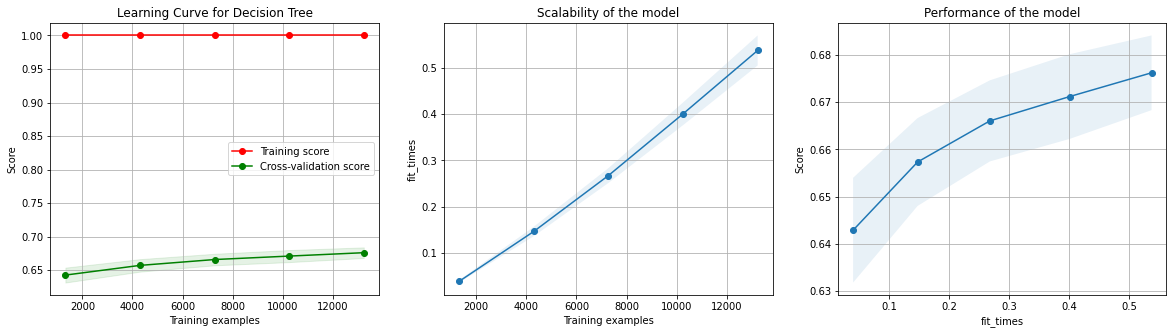

In [11]:
#fig, axes = plt.subplots(3, 1, figsize=(10, 15))


# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)


title = "Learning Curve for Decision Tree"
estimator = model
plot_learning_curve(estimator, title, X_train, Y_train,
                    cv=cv, n_jobs=4)
plt.show()
plt.close()
    

### Training of the given model

In [12]:
model = model.fit(X_train, Y_train)

In [13]:
target_names = ['Not Engaged','Engaged']
claf_report=classification_report(Y_test,model.predict(X_test),target_names=target_names,output_dict=True)
print(claf_report)

{'Not Engaged': {'precision': 0.6509433962264151, 'recall': 0.648019599836668, 'f1-score': 0.6494782074892572, 'support': 2449}, 'Engaged': {'precision': 0.7197659297789337, 'recall': 0.7223491027732464, 'f1-score': 0.7210552027357109, 'support': 3065}, 'accuracy': 0.6893362350380848, 'macro avg': {'precision': 0.6853546630026743, 'recall': 0.6851843513049571, 'f1-score': 0.6852667051124841, 'support': 5514}, 'weighted avg': {'precision': 0.6891989394506569, 'recall': 0.6893362350380848, 'f1-score': 0.6892648397762322, 'support': 5514}}


In [14]:
helix=pd.read_csv("./TopFeatures.csv")
h2=pd.read_csv("./heatMaps.csv")
helix['value']=h2
#print(helix)
helix.to_csv("Finalmaps.csv",index=None,header=None)

g1=pd.read_csv("./Finalmaps.csv",index_col=None)
h6=helix['value'].to_numpy()
h6=np.reshape(h6, (50, 1)) # C-like index ordering
#print(h6)

## HeatMap

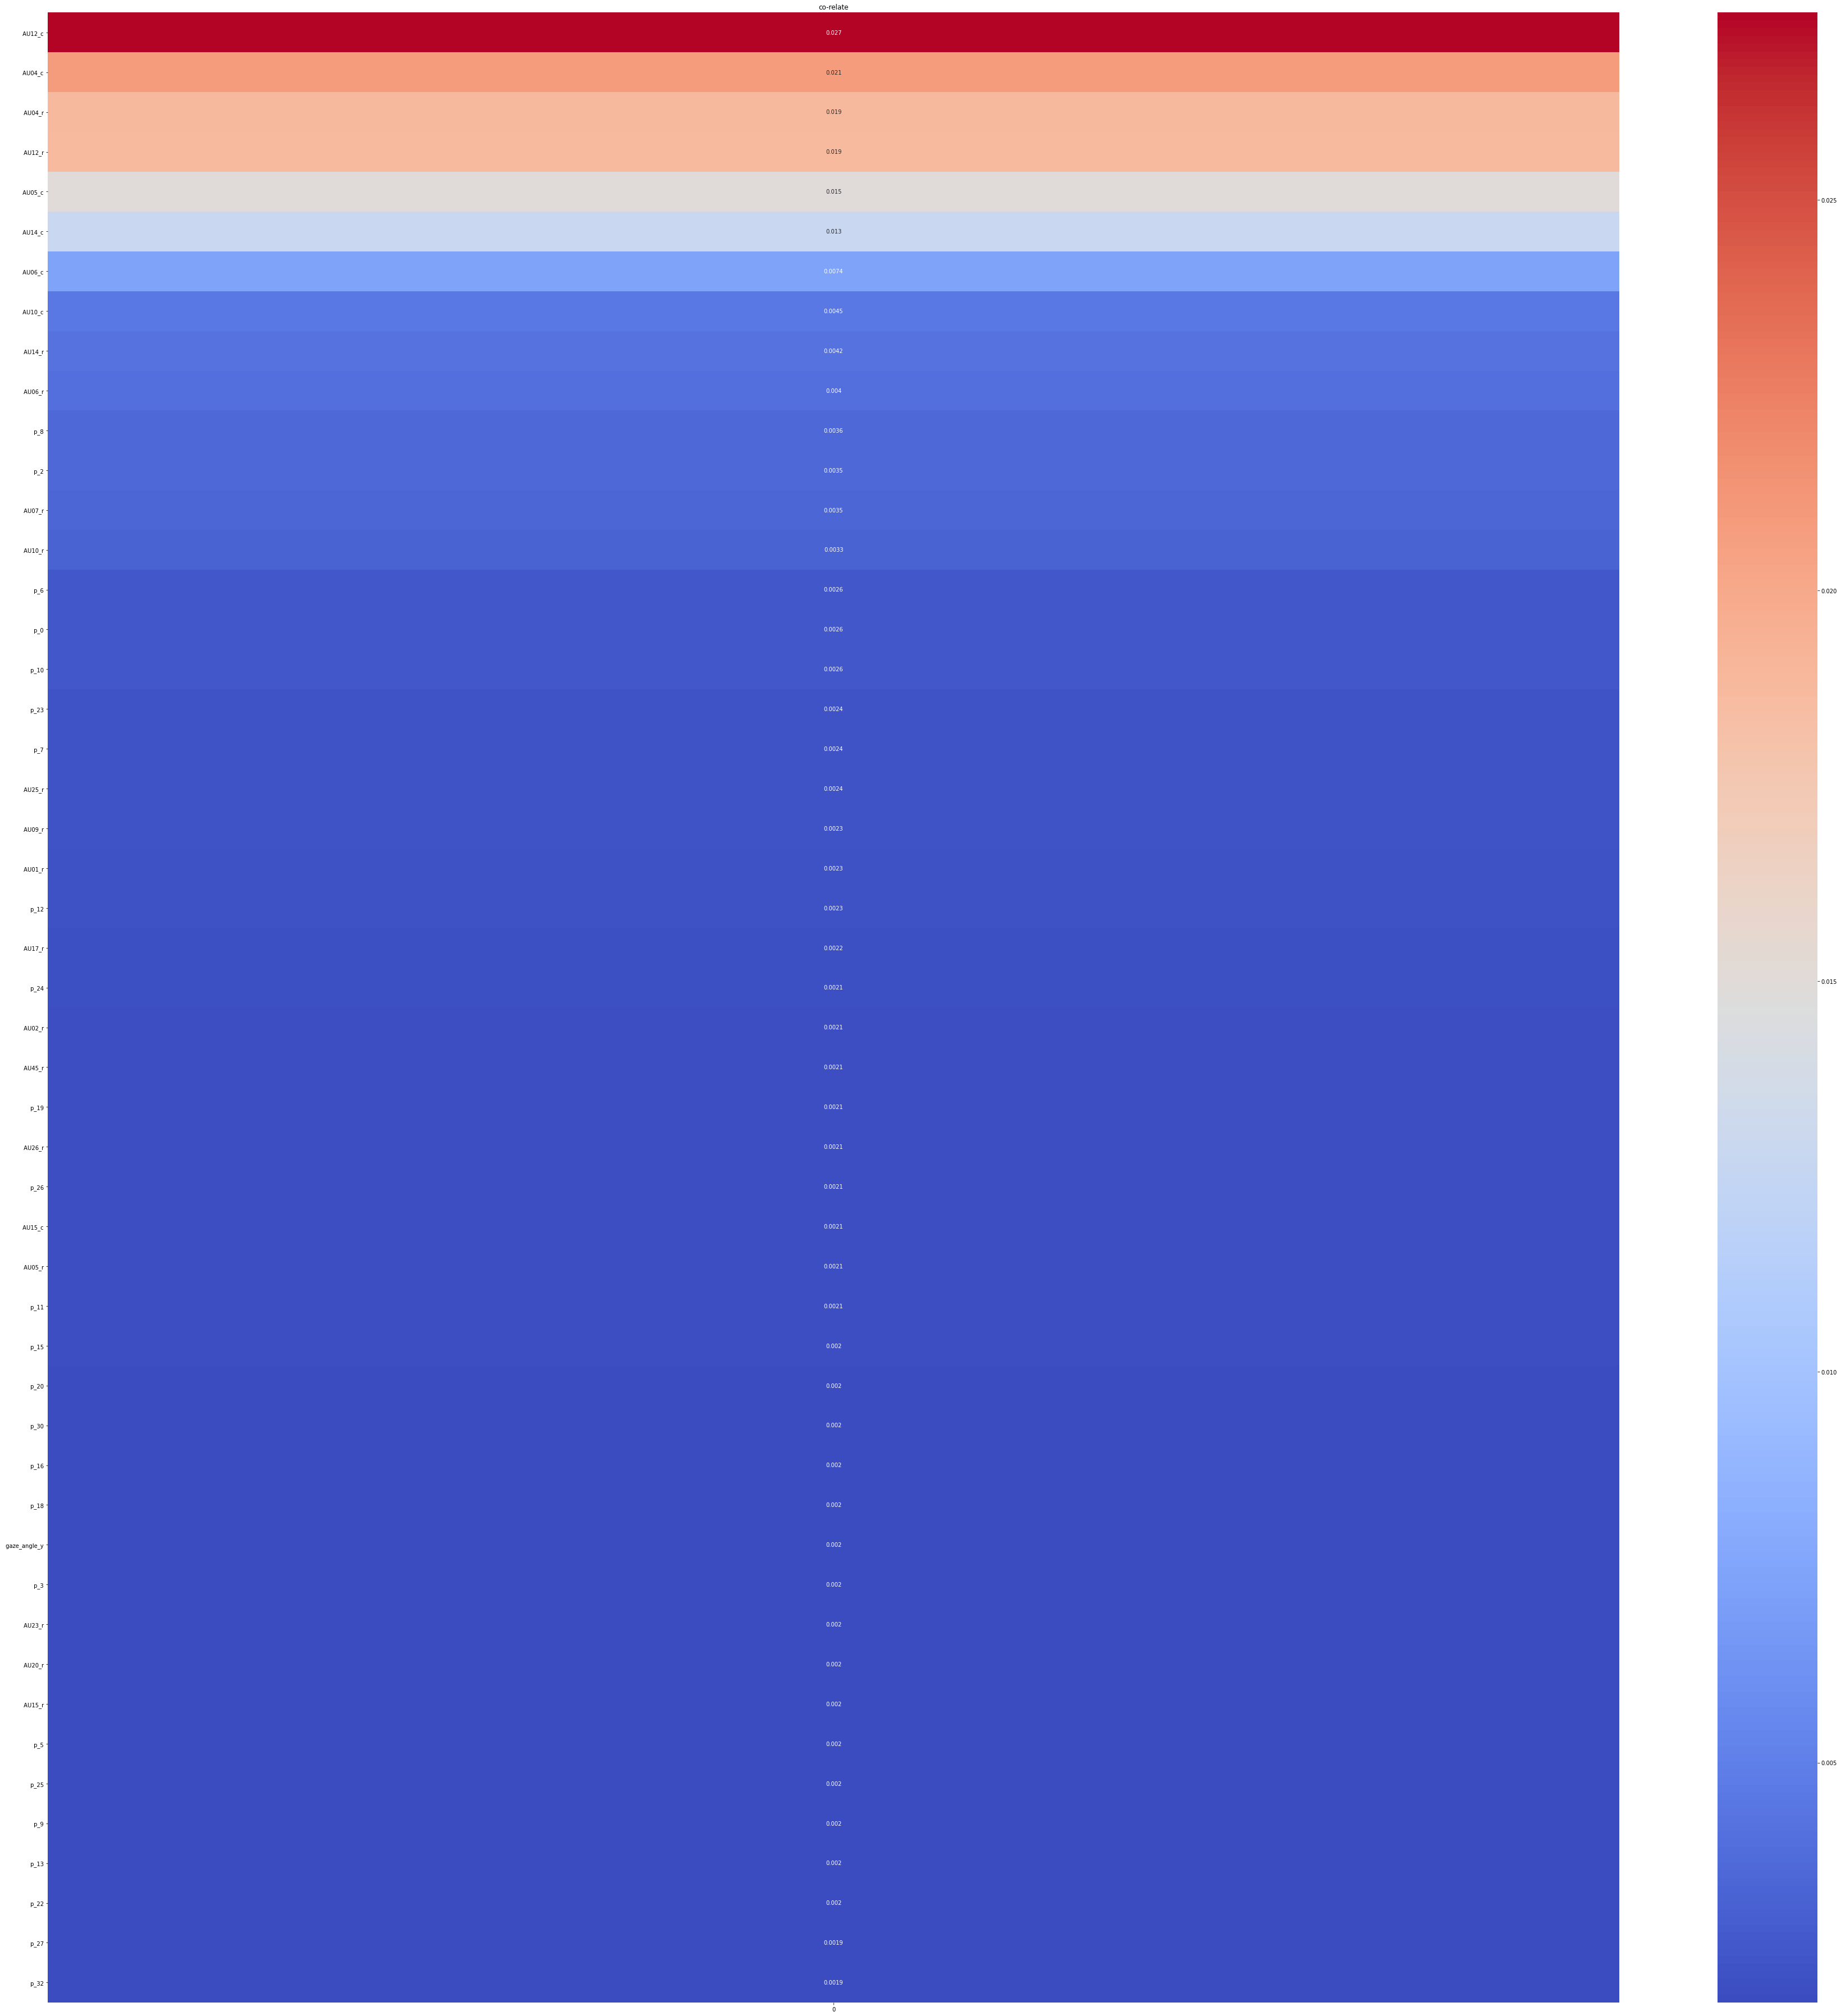

In [15]:
plt.figure(figsize=(50,50))

ax=sns.heatmap(h6, annot=True, cmap="coolwarm", yticklabels=helix['0']).set_title('co-relate')
plt.tight_layout()
plt.show()

<AxesSubplot:>

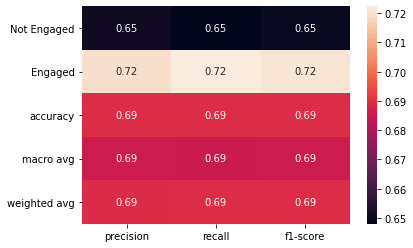

In [16]:
sns.heatmap(pd.DataFrame(claf_report).iloc[:-1, :].T, annot=True)

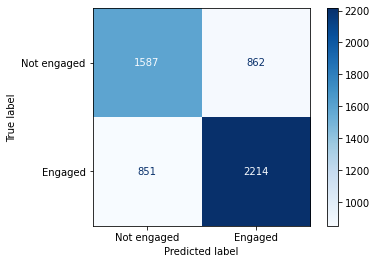

In [17]:
metrics.plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, display_labels=['Not engaged', 'Engaged'])

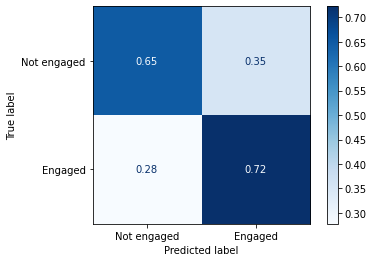

In [18]:
metrics.plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, display_labels=['Not engaged', 'Engaged'], normalize='true')

### Fitting the model on complete data

In [19]:
model = model.fit(x_train, y_train)

### Saving the Model

In [20]:
patho=r'./models'
joblib.dump(model, (os.path.join(patho,r''+'model_joblib_decision_tree')))

['./models/model_joblib_decision_tree']

In [21]:
plt.close()

In [22]:
tree.export_graphviz(model,
                     out_file="tree.dot",
                     feature_names = feat, 
                     class_names=["Not Engaged","Engaged"],
                     filled = True)